In [9]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
from pathlib import Path

# DateTime
# ==============================================================================
import datetime as dt

# Plots
# ==============================================================================
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn
# ==============================================================================
from sklearn import preprocessing
from sklearn import model_selection
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Seaborn
# ==============================================================================
import seaborn as sns

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

### Load the dataset.

In [10]:
# Load the CSV file as a Pandas DataFrame and preview the DataFrame.
nordstrom_df = pd.read_csv('Resources/cleaned_nordstrom_data.csv')

# Print shape and info of DataFrame.
print(nordstrom_df.shape)
print(nordstrom_df.info())
                           
# Preview DataFrame.
nordstrom_df.head(10)

(216109, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216109 entries, 0 to 216108
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                216109 non-null  int64  
 1   Department                216109 non-null  object 
 2   Category                  216109 non-null  object 
 3   Subcategory               216109 non-null  object 
 4   Product Name              216092 non-null  object 
 5   Stock-Keeping Unit (SKU)  216109 non-null  int64  
 6   Brand                     216044 non-null  object 
 7   Gender                    216109 non-null  object 
 8   Retail Price              216109 non-null  float64
 9   Current Price             216109 non-null  float64
 10  Review Rating             216109 non-null  float64
 11  Review Count              216109 non-null  int64  
 12  Promotion                 216109 non-null  float64
 13  Color                     21610

,Unnamed: 0,Department,Category,Subcategory,Product Name,Stock-Keeping Unit (SKU),Brand,Gender,Retail Price,Current Price,Review Rating,Review Count,Promotion,Color
0,0,Women,Clothing,"Blazers, Suits & Separates",Etiennette B Good Wool Suit Jacket,4578258,Theory,Women,345.0,345.0,4.1,85,0.0,498
1,1,Women,Clothing,"Blazers, Suits & Separates",Demitria 2 Stretch Good Wool Suit Pants,4954210,Theory,Women,215.0,215.0,4.2,71,0.0,020
2,2,Women,Clothing,"Blazers, Suits & Separates",Bermuda Shorts,5125568,Vince,Women,175.0,175.0,4.0,41,0.0,001
3,3,Women,Clothing,"Blazers, Suits & Separates",Drape Collar Knit Blazer,5184553,Caslon®,Women,69.0,69.0,4.3,590,0.0,401
4,4,Women,Clothing,"Blazers, Suits & Separates",Grace Jacket,5268077,NIC+ZOE,Women,148.0,148.0,3.9,51,0.0,004
5,5,Women,Clothing,"Blazers, Suits & Separates",Pintuck Stretch Crepe Skinny Pants,5323310,Vince Camuto,Women,89.0,89.0,3.5,56,0.0,006
6,6,Women,Clothing,"Blazers, Suits & Separates",Flare Ponte Pants,5353634,SPANX®,Women,148.0,148.0,3.8,19,0.0,001
7,7,Women,Clothing,"Blazers, Suits & Separates",Nina Notched Collar Blazer,5436249,Vince Camuto,Women,129.0,129.0,4.0,30,0.0,001
8,8,Women,Clothing,"Blazers, Suits & Separates",Everyday Cotton Blend Blazer,5727231,Nordstrom,Women,129.0,129.0,0.0,0,0.0,001
9,9,Women,Clothing,"Blazers, Suits & Separates",Twill Blazer,5743270,Halogen®,Women,99.0,99.0,3.0,3,0.0,001


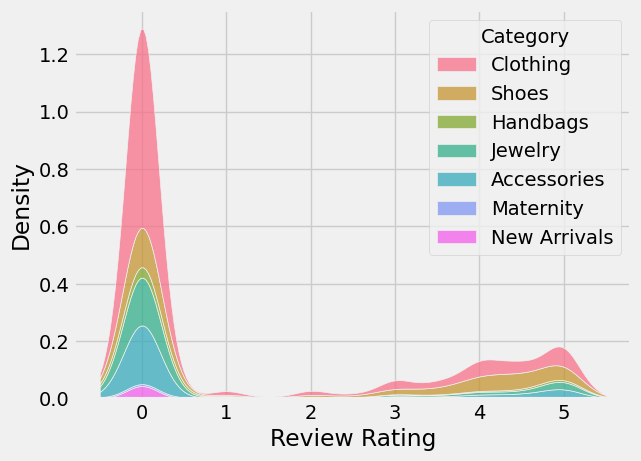

In [12]:
sns.kdeplot(data=nordstrom_df, x="Review Rating", hue="Category", multiple="stack")

# Saving the Seaborn Figure:
plt.savefig('RRbyDEN.png')

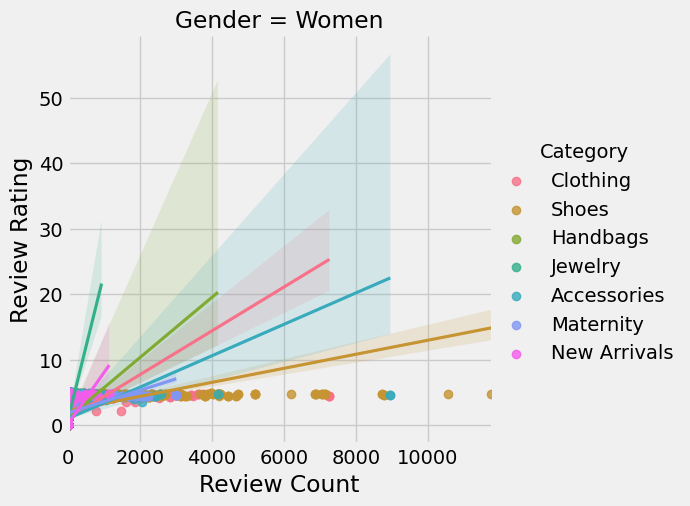

In [13]:
sns.lmplot(data=nordstrom_df, x="Review Count", y="Review Rating", col="Gender", hue="Category")

# Saving the Seaborn Figure:
plt.savefig('RCbyRR.png')

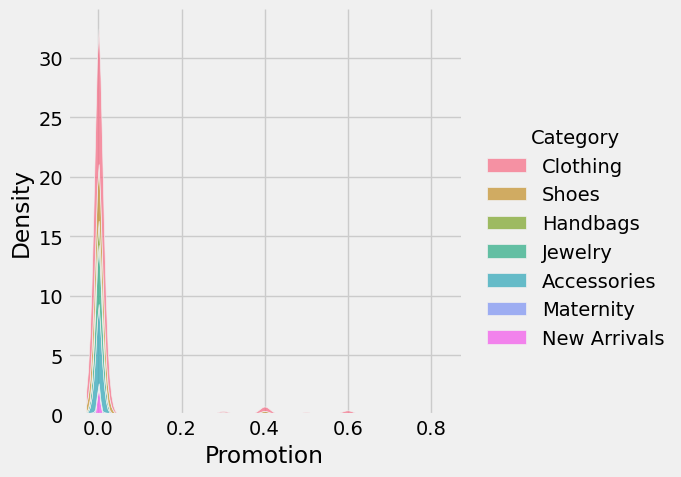

In [14]:
sns.displot(data=nordstrom_df, x="Promotion", hue="Category", multiple="stack", kind="kde")

# Saving the Seaborn Figure:
plt.savefig('PROMObyDEN.png')

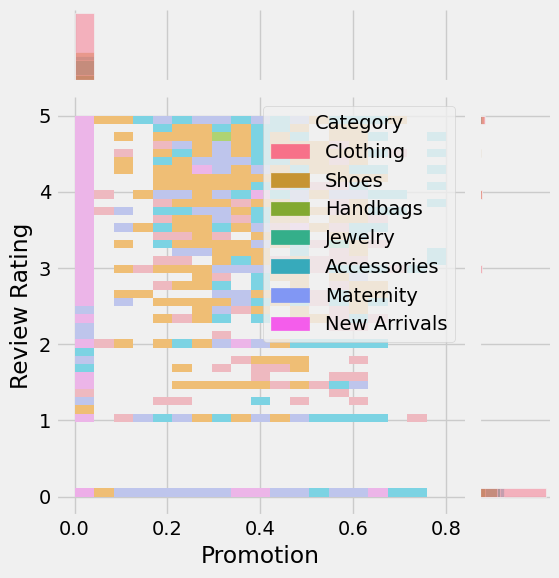

In [15]:
sns.jointplot(data=nordstrom_df, x="Promotion", y="Review Rating", hue="Category", kind="hist")

# Saving the Seaborn Figure:
plt.savefig('PROMObyRR_JP.png')